<a href="https://colab.research.google.com/github/chilaact/predict_aquatic_toxity/blob/experiment/Aquatic_Toxicity_Prediction_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals
#Importing Tensorflow

%tensorflow_version 2.x

import tensorflow as tf
tf.__version__

'2.2.0-rc1'

In [0]:
#Importing support modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [5]:
#Connecting to Drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#Load the data
data = pd.read_csv("/content/drive/My Drive/aquatic toxicity/qsar_aquatic_toxicity.csv", sep=";")

In [10]:
#Overview data
data.head()

,0,0.1,0.2,2.419,1.225,0.667,0.3,0.4,3.740
0,0.00,0.000,0,2.638,1.401,0.632,0,0,4.330
1,9.23,11.000,0,5.799,2.930,0.486,0,0,7.019
2,9.23,11.000,0,5.453,2.887,0.495,0,0,6.723
3,9.23,11.000,0,4.068,2.758,0.695,0,0,5.979
4,215.34,327.629,3,0.189,4.677,1.333,0,4,6.064


In [12]:
#Looks like the data dont have header, reload it with header
data = pd.read_csv("/content/drive/My Drive/aquatic toxicity/qsar_aquatic_toxicity.csv", sep=";", 
                   names=['TPSA(Tot)', 'SAacc', 'H-050', 'MLOGP', 'RDCHI', 'GATS1p', 'nN', 'C-040', 'quantitative response']) #from UCI web
data.head()

,TPSA(Tot),SAacc,H-050,MLOGP,RDCHI,GATS1p,nN,C-040,quantitative response
0,0.00,0.0,0,2.419,1.225,0.667,0,0,3.740
1,0.00,0.0,0,2.638,1.401,0.632,0,0,4.330
2,9.23,11.0,0,5.799,2.930,0.486,0,0,7.019
3,9.23,11.0,0,5.453,2.887,0.495,0,0,6.723
4,9.23,11.0,0,4.068,2.758,0.695,0,0,5.979


In [13]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TPSA(Tot),546.0,48.472930,46.763983,0.000,15.7900,40.4600,70.02250,347.320
SAacc,546.0,58.869018,68.166554,0.000,11.0000,42.6830,77.49275,571.952
H-050,546.0,0.937729,1.618632,0.000,0.0000,0.0000,1.00000,18.000
MLOGP,546.0,2.313493,1.741797,-6.446,1.2325,2.2735,3.39275,9.148
RDCHI,546.0,2.492299,0.811004,1.000,1.9750,2.3440,2.91100,6.439
GATS1p,546.0,1.046264,0.403677,0.281,0.7370,1.0205,1.26650,2.500
nN,546.0,1.003663,1.397240,0.000,0.0000,1.0000,2.00000,11.000
C-040,546.0,0.353480,0.806827,0.000,0.0000,0.0000,0.00000,11.000
quantitative response,546.0,4.658421,1.665215,0.122,3.6015,4.5160,5.60750,10.047


In [14]:
data.isna().sum()

TPSA(Tot)                0
SAacc                    0
H-050                    0
MLOGP                    0
RDCHI                    0
GATS1p                   0
nN                       0
C-040                    0
quantitative response    0
dtype: int64

**Great! No null data**

In [0]:
# Splitting the data
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(data.drop(axis=0, columns='quantitative response'),
                                                   data['quantitative response'],
                                                   test_size=0.3) #Train : Test = 70 : 30

# Building the model

For this dataset I want to explore possibilities of using different model architecture, I decide to using 2x 32, and 2x 64 hidden layer


In [0]:
#building the model

def select_model(num, x):
  if num == 1:
    model = tf.keras.Sequential([
                              tf.keras.layers.Dense(8, activation=tf.nn.relu, input_shape=[len(x.columns)]),
                              tf.keras.layers.Dense(8, activation=tf.nn.relu),
                              tf.keras.layers.Dense(8, activation=tf.nn.relu),
                              tf.keras.layers.Dense(1)
    ])
  elif num == 2:
    model = tf.keras.Sequential([
                              tf.keras.layers.Dense(32, activation=tf.nn.relu, input_shape=[len(x.columns)]),
                              tf.keras.layers.Dense(32, activation=tf.nn.relu),
                              tf.keras.layers.Dense(1)
    ])

  elif num == 3:
    model = tf.keras.Sequential([
                              tf.keras.layers.Dense(64, activation=tf.nn.relu, input_shape=[len(x.columns)]),
                              tf.keras.layers.Dense(64, activation=tf.nn.relu),
                              tf.keras.layers.Dense(1)
    ])
  
  return model

In [43]:
model_1 = select_model(1, X_train)

model_1.compile(loss='mse',
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=['mae', 'mse'])

model_1.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_20 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_21 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 9         
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


In [44]:
hist_1 = model_1.fit(X_train, y_train,
                  epochs=200, validation_split = 0.2, 
                  verbose=2)

Epoch 1/200
10/10 - 0s - loss: 24.1346 - mae: 4.4044 - mse: 23.5291 - val_loss: 16.6205 - val_mae: 3.6525 - val_mse: 17.4869
Epoch 2/200
10/10 - 0s - loss: 17.8074 - mae: 3.7405 - mse: 17.8335 - val_loss: 13.9491 - val_mae: 3.3246 - val_mse: 14.7154
Epoch 3/200
10/10 - 0s - loss: 14.5273 - mae: 3.3064 - mse: 14.4906 - val_loss: 12.8685 - val_mae: 3.1780 - val_mse: 13.7045
Epoch 4/200
10/10 - 0s - loss: 12.1980 - mae: 2.9868 - mse: 12.3402 - val_loss: 11.0862 - val_mae: 2.8944 - val_mse: 11.9989
Epoch 5/200
10/10 - 0s - loss: 11.5158 - mae: 2.7934 - mse: 11.2821 - val_loss: 10.3597 - val_mae: 2.7381 - val_mse: 11.4028
Epoch 6/200
10/10 - 0s - loss: 10.6807 - mae: 2.6990 - mse: 10.4210 - val_loss: 9.2027 - val_mae: 2.6228 - val_mse: 9.9202
Epoch 7/200
10/10 - 0s - loss: 10.0886 - mae: 2.6549 - mse: 9.9412 - val_loss: 8.8076 - val_mae: 2.5643 - val_mse: 9.4583
Epoch 8/200
10/10 - 0s - loss: 9.4926 - mae: 2.5797 - mse: 9.4067 - val_loss: 8.0027 - val_mae: 2.4339 - val_mse: 8.6054
Epoch 9/2

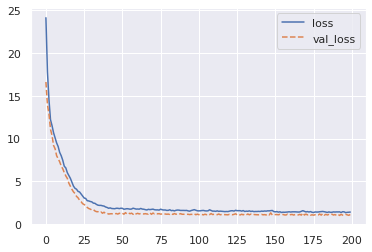

In [45]:
hist = pd.DataFrame(hist_1.history)
hist['epoch'] = hist_1.epoch

plt.plot(hist['epoch'], hist['loss'], label='loss')
plt.plot(hist['epoch'], hist['val_loss'], ls='dashed', label='val_loss')
plt.legend(loc='upper right')
plt.show()

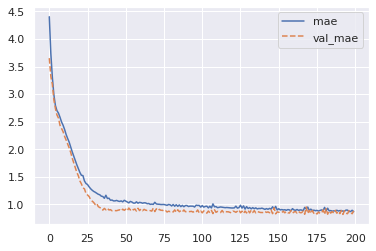

In [46]:
plt.plot(hist['epoch'], hist['mae'], label='mae')
plt.plot(hist['epoch'], hist['val_mae'], ls='dashed', label='val_mae')
plt.legend(loc='upper right')
plt.show()

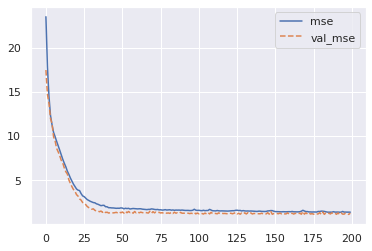

In [47]:
plt.plot(hist['epoch'], hist['mse'], label='mse')
plt.plot(hist['epoch'], hist['val_mse'], ls='dashed', label='val_mse')
plt.legend(loc='upper right')
plt.show()

In [102]:
loss_1, mae_1, mse_1 = model_1.evaluate(X_test, y_test, verbose=2)
print(f"MSE: {mse_1}\nMAE: {mae_1}")

6/6 - 0s - loss: 1.2392 - mae: 0.8113 - mse: 1.2994
MSE: 1.2993717193603516
MAE: 0.8112743496894836


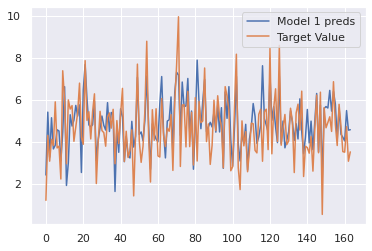

In [51]:
preds = model_1.predict(X_test)

plt.plot(list(preds), label='Model 1 preds')
plt.plot(list(y_test), label='Target Value')

plt.legend(loc="upper right")

In [0]:
model_1.save("/content/drive/My Drive/aquatic toxicity/model-v1.hdf5")

In [75]:
# Second Model
model_2 = select_model(2, X_train)

model_2.compile(loss='mse',
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=['mae', 'mse'])

model_2.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 32)                288       
_________________________________________________________________
dense_34 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 33        
Total params: 1,377
Trainable params: 1,377
Non-trainable params: 0
_________________________________________________________________


In [76]:
hist_2 = model_2.fit(X_train, y_train,
                  epochs=200, validation_split = 0.2, 
                  verbose=2)

Epoch 1/200
10/10 - 0s - loss: 194.1662 - mae: 11.6433 - mse: 199.6537 - val_loss: 75.5947 - val_mae: 7.7236 - val_mse: 84.5760
Epoch 2/200
10/10 - 0s - loss: 38.9521 - mae: 5.1378 - mse: 39.2584 - val_loss: 13.8277 - val_mae: 3.1738 - val_mse: 15.0739
Epoch 3/200
10/10 - 0s - loss: 21.7737 - mae: 3.7012 - mse: 21.8070 - val_loss: 14.7682 - val_mae: 3.3035 - val_mse: 16.7063
Epoch 4/200
10/10 - 0s - loss: 21.5447 - mae: 3.6755 - mse: 22.1242 - val_loss: 11.5484 - val_mae: 2.9475 - val_mse: 12.8232
Epoch 5/200
10/10 - 0s - loss: 16.5600 - mae: 3.2673 - mse: 16.1639 - val_loss: 9.8022 - val_mae: 2.6730 - val_mse: 10.5527
Epoch 6/200
10/10 - 0s - loss: 13.2331 - mae: 3.0039 - mse: 13.3605 - val_loss: 9.6530 - val_mae: 2.5878 - val_mse: 10.1633
Epoch 7/200
10/10 - 0s - loss: 12.3614 - mae: 2.8307 - mse: 11.9397 - val_loss: 8.4488 - val_mae: 2.3662 - val_mse: 8.8493
Epoch 8/200
10/10 - 0s - loss: 10.5420 - mae: 2.5942 - mse: 10.5758 - val_loss: 7.5353 - val_mae: 2.2642 - val_mse: 7.9673
Epo

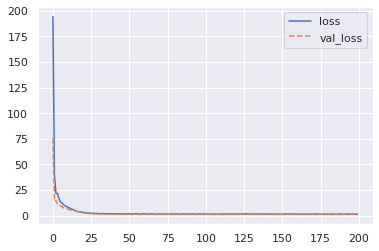

In [77]:
hist = pd.DataFrame(hist_2.history)
hist['epoch'] = hist_2.epoch

plt.plot(hist['epoch'], hist['loss'], label='loss')
plt.plot(hist['epoch'], hist['val_loss'], ls='dashed', label='val_loss')
plt.legend(loc='upper right')
plt.show()

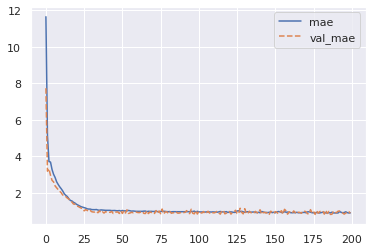

In [78]:
plt.plot(hist['epoch'], hist['mae'], label='mae')
plt.plot(hist['epoch'], hist['val_mae'], ls='dashed', label='val_mae')
plt.legend(loc='upper right')
plt.show()

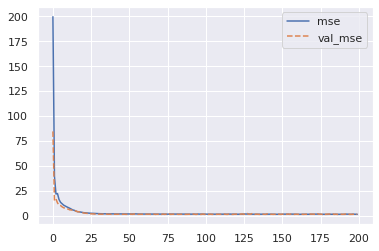

In [79]:
plt.plot(hist['epoch'], hist['mse'], label='mse')
plt.plot(hist['epoch'], hist['val_mse'], ls='dashed', label='val_mse')
plt.legend(loc='upper right')
plt.show()

In [103]:
loss_2, mae_2, mse_2 = model_2.evaluate(X_test, y_test, verbose=2)
print(f"MSE: {mse_2}\nMAE: {mae_2}")

6/6 - 0s - loss: 1.3555 - mae: 0.8704 - mse: 1.3214
MSE: 1.321419358253479
MAE: 0.8703620433807373


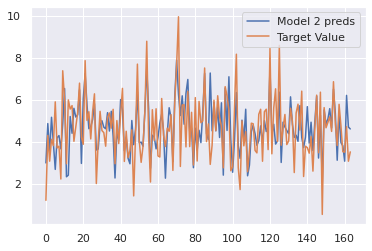

In [81]:
preds = model_2.predict(X_test)

plt.plot(list(preds), label='Model 2 preds')
plt.plot(list(y_test), label='Target Value')

plt.legend(loc="upper right")

In [0]:
model_2.save("/content/drive/My Drive/aquatic toxicity/model-v2.hdf5")

In [92]:
# Second Model
model_3 = select_model(3, X_train)

model_3.compile(loss='mse',
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=['mae', 'mse'])

model_3.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 64)                576       
_________________________________________________________________
dense_43 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 65        
Total params: 4,801
Trainable params: 4,801
Non-trainable params: 0
_________________________________________________________________


In [93]:
hist_3 = model_3.fit(X_train, y_train,
                  epochs=200, validation_split = 0.2, 
                  verbose=2)

Epoch 1/200
10/10 - 0s - loss: 109.2371 - mae: 8.3576 - mse: 113.9966 - val_loss: 11.7459 - val_mae: 2.9032 - val_mse: 13.2446
Epoch 2/200
10/10 - 0s - loss: 30.2549 - mae: 3.8427 - mse: 29.3887 - val_loss: 35.6162 - val_mae: 4.3082 - val_mse: 42.0288
Epoch 3/200
10/10 - 0s - loss: 15.6948 - mae: 2.9844 - mse: 16.0418 - val_loss: 8.8785 - val_mae: 2.5755 - val_mse: 9.0718
Epoch 4/200
10/10 - 0s - loss: 11.5842 - mae: 2.9853 - mse: 11.6214 - val_loss: 8.1118 - val_mae: 2.4293 - val_mse: 8.1930
Epoch 5/200
10/10 - 0s - loss: 7.6808 - mae: 2.3208 - mse: 7.8152 - val_loss: 7.9866 - val_mae: 2.3019 - val_mse: 8.8428
Epoch 6/200
10/10 - 0s - loss: 6.0081 - mae: 2.0041 - mse: 6.1552 - val_loss: 5.1259 - val_mae: 1.8834 - val_mse: 5.2557
Epoch 7/200
10/10 - 0s - loss: 5.1278 - mae: 1.8257 - mse: 5.1755 - val_loss: 4.6649 - val_mae: 1.7374 - val_mse: 4.9236
Epoch 8/200
10/10 - 0s - loss: 4.1746 - mae: 1.5851 - mse: 4.1773 - val_loss: 3.4424 - val_mae: 1.4516 - val_mse: 3.4931
Epoch 9/200
10/10 

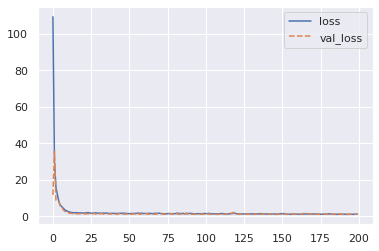

In [94]:
hist = pd.DataFrame(hist_3.history)
hist['epoch'] = hist_3.epoch

plt.plot(hist['epoch'], hist['loss'], label='loss')
plt.plot(hist['epoch'], hist['val_loss'], ls='dashed', label='val_loss')
plt.legend(loc='upper right')
plt.show()

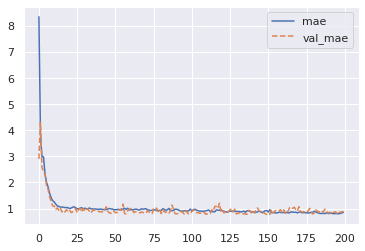

In [95]:
plt.plot(hist['epoch'], hist['mae'], label='mae')
plt.plot(hist['epoch'], hist['val_mae'], ls='dashed', label='val_mae')
plt.legend(loc='upper right')
plt.show()

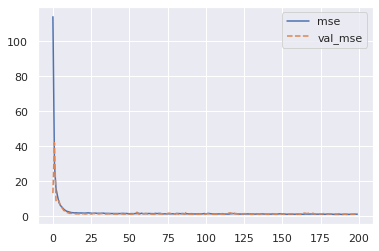

In [96]:
plt.plot(hist['epoch'], hist['mse'], label='mse')
plt.plot(hist['epoch'], hist['val_mse'], ls='dashed', label='val_mse')
plt.legend(loc='upper right')
plt.show()

In [104]:
loss_3, mae_3, mse_3 = model_3.evaluate(X_test, y_test, verbose=2)
print(f"MSE: {mse_3}\nMAE: {mae_3}")

6/6 - 0s - loss: 1.3971 - mae: 0.8763 - mse: 1.4102
MSE: 1.4101556539535522
MAE: 0.8762568831443787


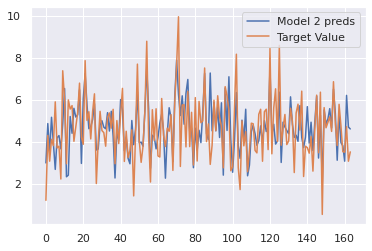

In [98]:
preds = model_2.predict(X_test)

plt.plot(list(preds), label='Model 2 preds')
plt.plot(list(y_test), label='Target Value')

plt.legend(loc="upper right")

In [0]:
model_3.save("/content/drive/My Drive/aquatic toxicity/model-v3.hdf5")

# Model Comparison

When we trained each model, we tried to running for 100, 200 and 500 epochs but we don't keep the experiment and only keep the best epochs. We found that 100 epochs is not enough to reach minimum loss, and 500 don't change the loss significantly, so 200 epochs is the best.

Here the compact comaprison of each model

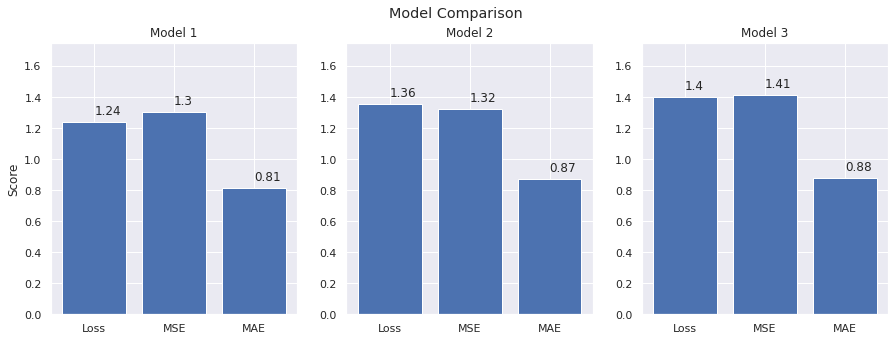

In [123]:
model_1_result = [loss_1, mse_1, mae_1]
model_2_result = [loss_2, mse_2, mae_2]
model_3_result = [loss_3, mse_3, mae_3]
columns = ['Loss', 'MSE', 'MAE']

plt.figure(figsize=(15, 5))

#model 1
plt.subplot(131)
plt.title('Model 1')
plt.ylabel('Score')
plt.ylim(0, 1.75)
plt.bar(columns, model_1_result)
for index, value in enumerate(model_1_result):
    plt.text(index, value+0.05, str(round(value, 2)))

#model 2
plt.subplot(132)
plt.title('Model 2')
plt.ylim(0, 1.75)
plt.bar(columns, model_2_result)
for index, value in enumerate(model_2_result):
    plt.text(index, value+0.05, str(round(value, 2)))

#model 3
plt.subplot(133)
plt.title('Model 3')
plt.ylim(0, 1.75)
plt.bar(columns, model_3_result)
for index, value in enumerate(model_3_result):
    plt.text(index, value+0.05, str(round(value, 2)))

plt.suptitle('Model Comparison')
plt.show()

We can clearly see that all model is not significant in score difference, but model 1 is doing better than model 2 and 3. We realized that sometimes less is more :D

# How far it'll go

After got best model architecture, we want to see is this score can go much lower. We decide to test the best model architecture which is model 1 with 3x 8 hidden layer to trained with only high correlated features. Let's see...

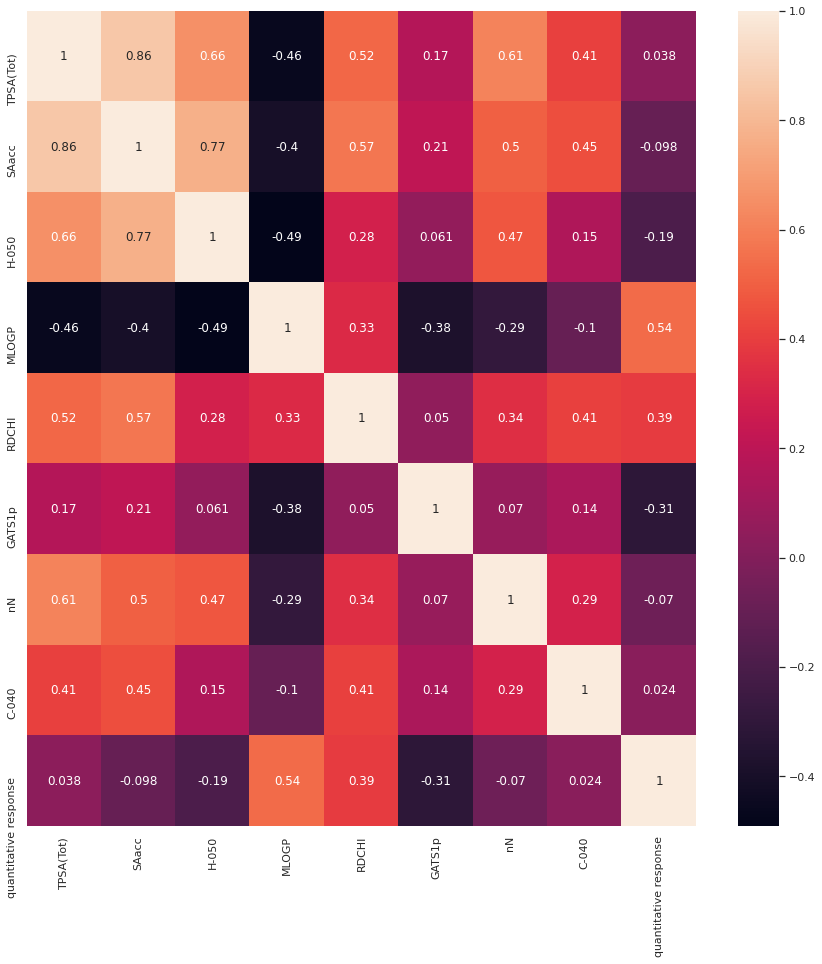

In [127]:
# Take a look at feature correlation
plt.figure(figsize=(15, 15))
p = sns.heatmap(data.corr(), annot=True)

We can see that features number 2, 3, 6, and 7 is have negative correlation, which is slightly moving opposite against target value. Let's drop them...

In [128]:
highCorr_X_train = X_train.drop(['SAacc', 'H-050', 'GATS1p', 'nN'], axis=1)
highCorr_X_train.head()

,TPSA(Tot),MLOGP,RDCHI,C-040
426,0.00,3.386,2.284,0
450,17.07,1.442,1.840,0
10,0.00,3.124,1.800,0
15,0.00,2.851,1.989,0
275,0.00,3.478,1.918,0


In [147]:
model_4 = select_model(1, highCorr_X_train)

model_4.compile(loss='mse',
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=['mae', 'mse'])

model_4.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 8)                 40        
_________________________________________________________________
dense_62 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_63 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_64 (Dense)             (None, 1)                 9         
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


In [148]:
hist_4 = model_4.fit(highCorr_X_train, y_train,
                  epochs=200, validation_split = 0.2, 
                  verbose=2)

Epoch 1/200
10/10 - 0s - loss: 46.9008 - mae: 6.4601 - mse: 47.1845 - val_loss: 34.2228 - val_mae: 5.6807 - val_mse: 36.4408
Epoch 2/200
10/10 - 0s - loss: 38.3470 - mae: 5.8342 - mse: 38.4189 - val_loss: 28.4426 - val_mae: 5.1553 - val_mse: 30.1311
Epoch 3/200
10/10 - 0s - loss: 32.4165 - mae: 5.3592 - mse: 32.3905 - val_loss: 24.4396 - val_mae: 4.7478 - val_mse: 25.7778
Epoch 4/200
10/10 - 0s - loss: 27.9186 - mae: 4.9925 - mse: 28.2559 - val_loss: 21.5946 - val_mae: 4.4306 - val_mse: 22.6823
Epoch 5/200
10/10 - 0s - loss: 25.6208 - mae: 4.7430 - mse: 25.5706 - val_loss: 20.4667 - val_mae: 4.3035 - val_mse: 21.4113
Epoch 6/200
10/10 - 0s - loss: 24.9823 - mae: 4.6827 - mse: 24.9340 - val_loss: 20.3131 - val_mae: 4.2855 - val_mse: 21.2496
Epoch 7/200
10/10 - 0s - loss: 24.7438 - mae: 4.6635 - mse: 24.7430 - val_loss: 20.1726 - val_mae: 4.2689 - val_mse: 21.1036
Epoch 8/200
10/10 - 0s - loss: 24.7103 - mae: 4.6459 - mse: 24.5718 - val_loss: 20.0381 - val_mae: 4.2528 - val_mse: 20.9647


In [149]:
loss_4, mae_4, mse_4 = model_4.evaluate(X_test.drop(['SAacc', 'H-050', 'GATS1p', 'nN'], axis=1), y_test, verbose=2)
print(f"MSE: {mse_4}\nMAE: {mae_4}")

6/6 - 0s - loss: 1.6129 - mae: 0.9939 - mse: 1.6522
MSE: 1.6522172689437866
MAE: 0.9938591718673706


In [0]:
model_4.save("/content/drive/My Drive/aquatic toxicity/model-v4.hdf5")

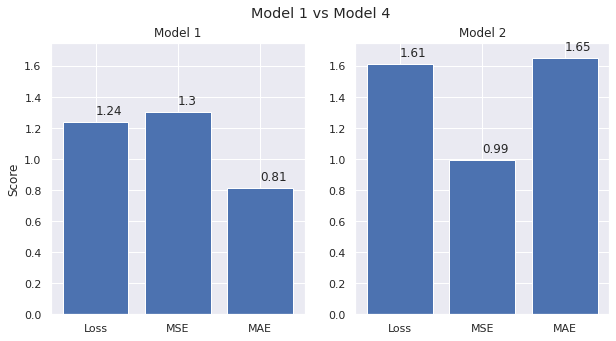

In [151]:
plt.figure(figsize=(10, 5))

#model 1
plt.subplot(121)
plt.title('Model 1')
plt.ylabel('Score')
plt.ylim(0, 1.75)
plt.bar(columns, model_1_result)
for index, value in enumerate(model_1_result):
    plt.text(index, value+0.05, str(round(value, 2)))

model_4_result = [loss_4, mae_4, mse_4]
#model 4
plt.subplot(122)
plt.title('Model 2')
plt.ylim(0, 1.75)
plt.bar(columns, model_4_result)
for index, value in enumerate(model_4_result):
    plt.text(index, value+0.05, str(round(value, 2)))

plt.suptitle('Model 1 vs Model 4')
plt.show()

Model 4 win in MSE but overall it lose. Model 1 still the best


# Final Model

After experiment model 1 with 200 epochs is the best, so we trained all the data with model 1 and save the final model

In [154]:
X, Y = data.drop(axis=0, columns='quantitative response'), data['quantitative response']

model_final = select_model(1, X)

model_final.compile(loss='mse',
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=['mae', 'mse'])

hist_final = model_final.fit(X, Y, epochs=200, 
                validation_split=0.1, verbose=2)

Epoch 1/200
16/16 - 0s - loss: 10.7620 - mae: 2.6560 - mse: 10.7579 - val_loss: 11.5015 - val_mae: 3.0273 - val_mse: 12.0646
Epoch 2/200
16/16 - 0s - loss: 9.6194 - mae: 2.5060 - mse: 9.5105 - val_loss: 10.8336 - val_mae: 2.9295 - val_mse: 11.3929
Epoch 3/200
16/16 - 0s - loss: 8.5547 - mae: 2.3311 - mse: 8.4941 - val_loss: 9.8177 - val_mae: 2.7429 - val_mse: 10.3740
Epoch 4/200
16/16 - 0s - loss: 7.9399 - mae: 2.2423 - mse: 7.8838 - val_loss: 9.0714 - val_mae: 2.6035 - val_mse: 9.5900
Epoch 5/200
16/16 - 0s - loss: 7.5955 - mae: 2.1690 - mse: 7.4143 - val_loss: 8.1013 - val_mae: 2.4261 - val_mse: 8.5289
Epoch 6/200
16/16 - 0s - loss: 7.0854 - mae: 2.1047 - mse: 7.0157 - val_loss: 7.4584 - val_mae: 2.3155 - val_mse: 7.8941
Epoch 7/200
16/16 - 0s - loss: 6.3005 - mae: 1.9660 - mse: 6.2865 - val_loss: 7.0682 - val_mae: 2.2533 - val_mse: 7.4898
Epoch 8/200
16/16 - 0s - loss: 5.6763 - mae: 1.8817 - mse: 5.6738 - val_loss: 6.1209 - val_mae: 2.0688 - val_mse: 6.4599
Epoch 9/200
16/16 - 0s - 

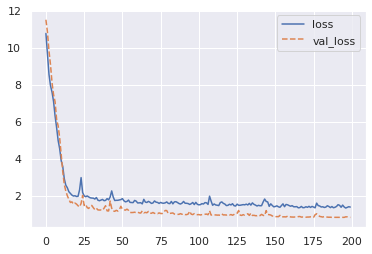

In [155]:
hist = pd.DataFrame(hist_final.history)
hist['epoch'] = hist_final.epoch

plt.plot(hist['epoch'], hist['loss'], label='loss')
plt.plot(hist['epoch'], hist['val_loss'], ls='dashed', label='val_loss')
plt.legend(loc='upper right')
plt.show()

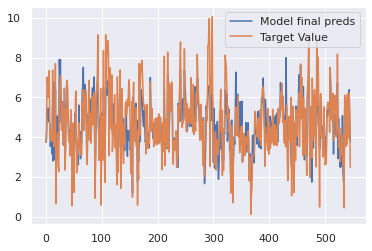

In [160]:
preds = model_final.predict(X)

plt.plot(list(preds), label='Model final preds')
plt.plot(list(Y), label='Target Value')

plt.legend(loc="upper right")

In [161]:
loss, mae, mse = model_final.evaluate(X, Y, verbose=2)
print(f"MSE: {mse}\nMAE: {mae}")

18/18 - 0s - loss: 1.2628 - mae: 0.8468 - mse: 1.2849
MSE: 1.284924864768982
MAE: 0.846829354763031


In [0]:
model_final.save("/content/drive/My Drive/aquatic toxicity/model-final.hdf5")